In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

X_train_fs = pd.read_csv('./X_train.csv', error_bad_lines=False, sep=',')
X_test_fs = pd.read_csv('./X_test.csv', error_bad_lines=False, sep=',')
y_train = pd.read_csv('./y_train.csv', error_bad_lines=False, sep=',')
y_test = pd.read_csv('./y_test.csv', error_bad_lines=False, sep=',')

#df = df.drop(df.columns[[0,1,5]], axis = 1)
X_train_fs.shape, y_train.shape

((1080, 61), (1080, 1))

In [17]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [18]:
# Use the model classifier to fit data:
model = GradientBoostingClassifier(loss='deviance', #deviance or explonential
                               criterion='squared_error', #{‘friedman_mse’, ‘mse’, ‘mae’}, default=’friedman_mse’
                               learning_rate=0.1, # default 1.0
                               subsample=1.0, #default=1.0
                               random_state=0, # random state for reproducibility
                               max_features='sqrt', # number of random features to use sqrt(n_features)
                               min_samples_leaf=1000, # minimum no of observarions allowed in a leaf
                               max_depth=3, # maximum depth of the tree
                               n_estimators=1000 # how many trees to build
                              )
clf = model.fit(X_train_fs, y_train)

# Predict y data with classifier: 
y_predict = model.predict(X_test_fs)

model.score(X_test_fs, y_test)

print(' training score: {}'.format(model.score(X_train_fs, y_train)))
print(' testing score: {}'.format(model.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.2
 testing score: 0.14634146341463414
Accuracy Score of Random Forest is : 0.14634146341463414
Confusion Matrix : 
[[24  0  0  0  0]
 [15  0  0  0  0]
 [71  0  0  0  0]
 [30  0  0  0  0]
 [24  0  0  0  0]]
Classification Report : 
              precision    recall  f1-score   support

         1.0       0.15      1.00      0.26        24
         2.0       0.00      0.00      0.00        15
         3.0       0.00      0.00      0.00        71
         4.0       0.00      0.00      0.00        30
         5.0       0.00      0.00      0.00        24

    accuracy                           0.15       164
   macro avg       0.03      0.20      0.05       164
weighted avg       0.02      0.15      0.04       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


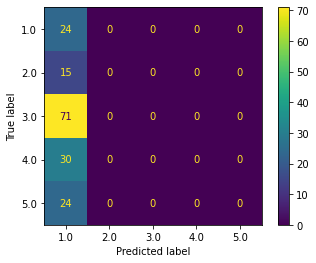

In [19]:
plot_confusion_matrix(model, X_test_fs, y_test)
plt.show()